This notebook implements Principal Component Analysis

References:

https://medium.com/data-science/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

https://medium.com/intuition/mathematical-understanding-of-principal-component-analysis-6c761004c2f8

https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/


In [1]:
!pip install ucimlrepo

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [3]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [4]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [5]:
# Drop string var for simplicity, no encoding needed this way
X = X.drop(columns='Sex', axis=1)
X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
# 1. Standardize data to mean 0 and std 1
X_normalized = X.copy()
for c in X_normalized.columns:
    X_normalized[c] = (X_normalized[c] - X_normalized[c].mean()) / X_normalized[c].std()
X_normalized

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574489,-0.432097,-1.064297,-0.641821,-0.607613,-0.726125,-0.638140
1,-1.448812,-1.439757,-1.183837,-1.230130,-1.170770,-1.205077,-1.212842
2,0.050027,0.122116,-0.107978,-0.309432,-0.463444,-0.356647,-0.207114
3,-0.699393,-0.432097,-0.347058,-0.637743,-0.648160,-0.607527,-0.602222
4,-1.615350,-1.540523,-1.422916,-1.271933,-1.215822,-1.287183,-1.320599
...,...,...,...,...,...,...,...
4172,0.341468,0.424414,0.609261,0.118799,0.047902,0.532836,0.073053
4173,0.549640,0.323648,-0.107978,0.279896,0.358765,0.309325,0.155666
4174,0.632909,0.676328,1.565580,0.708127,0.748470,0.975296,0.496895
4175,0.841081,0.777094,0.250642,0.541933,0.773248,0.733540,0.410690


In [ ]:
# 2. Calculate the covariance matrix
# TODO it would be cool to further decompose this by calculating covariance matrix using standard python code
X_normalized_cov = X_normalized.cov()
X_normalized_cov

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [87]:
# 3. Compute Eigenvectors and corresponding Eigenvalues
# TODO: it would be helpful to implement eigen val/vectors through standard python code
eigenvalues, eigenvectors = np.linalg.eig(X_normalized_cov)
# TODO there is some re-arranging needed that i dont yet understand: https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/#Step-4:-Rearrange-the-eigenvectors-and-eigenvalues-
eigenvalues, eigenvectors

(array([6.35511203, 0.27943236, 0.16734467, 0.11407185, 0.06465392,
        0.0127281 , 0.00665707]),
 array([[ 3.83250818e-01,  3.78652906e-02,  5.93279947e-01,
         -8.93316727e-02, -4.05126002e-02, -6.99651086e-01,
         -2.38929537e-02],
        [ 3.83573189e-01,  6.53232412e-02,  5.85366078e-01,
         -8.28581396e-03, -8.51762772e-03,  7.11025627e-01,
          1.58868202e-02],
        [ 3.48143831e-01,  8.66836026e-01, -3.14876363e-01,
         -1.65564868e-01,  2.71104239e-02, -9.84128310e-03,
          7.07791518e-04],
        [ 3.90673460e-01, -2.33271169e-01, -2.30825219e-01,
          5.22801642e-02,  1.10183954e-01,  2.16532984e-02,
         -8.51079281e-01],
        [ 3.78188288e-01, -3.48010694e-01, -2.31567768e-01,
         -4.96179039e-01,  5.45339050e-01,  1.10305160e-02,
          3.72194242e-01],
        [ 3.81513407e-01, -2.52902946e-01, -2.70252667e-01,
         -1.40972073e-01, -8.09328460e-01,  2.39960631e-02,
          2.04913695e-01],
        [ 3.7892

In [15]:
# 4. Sort the eigenvalues from largest to smallest. In doing so also sort the eigenvectors accordingly
# Note: Numpy automatically does this so we get to skip it :)

In [79]:
# 5. Chose number of principal components (I will chose 2)
# Select top k eigenvectors
k = 2
W = eigenvectors[:k, :] # Projection matrix

print(W.shape)

(2, 7)


Explained variance: [90.79  3.99  2.39  1.63  0.92  0.18  0.1 ]
Cumulative explained variance: [ 90.79  94.78  97.17  98.8   99.72  99.9  100.  ]


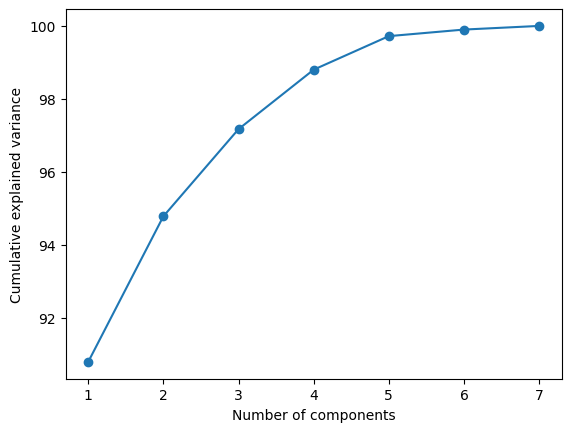

In [22]:
n_features = len(X_normalized.columns)
eig_vals_total = sum(eigenvalues)
explained_variance = [(i / eig_vals_total)*100 for i in eigenvalues]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [65]:
# 5. Project the samples onto the new subspace
X_proj = X_normalized.dot(W.T)
X_proj.shape

(4177, 2)

In [51]:
# 1. Get unique values
unique_rings = y['Rings'].unique()

# 2. Use a colormap to generate enough colors
# 'viridis', 'tab20', or 'rainbow' are good choices for many categories
cmap = plt.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(unique_rings))]

# 3. Create the mapping dictionary
color_dict = dict(zip(unique_rings, colors))

# 4. Map the colors
y_color = y["Rings"].map(color_dict)

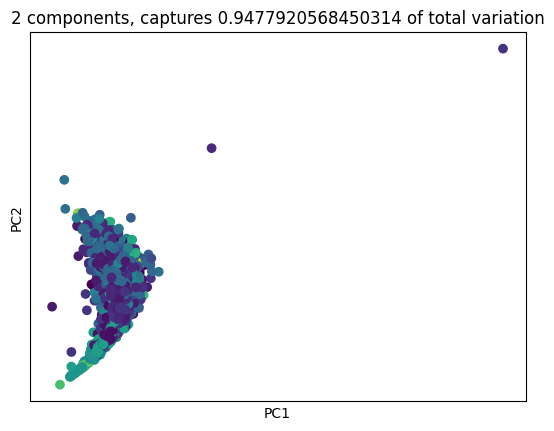

In [66]:
plt.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c = y_color)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Components:
 [[ 0.38325082  0.38357319  0.34814383  0.39067346  0.37818829  0.38151341
   0.37892173]
 [ 0.03786529  0.06532324  0.86683603 -0.23327117 -0.34801069 -0.25290295
  -0.05837478]]
Explained variance ratio:
 [0.90787315 0.03991891]
Cumulative explained variance:
 [0.90787315 0.94779206]
Transformed data shape: (4177, 2)


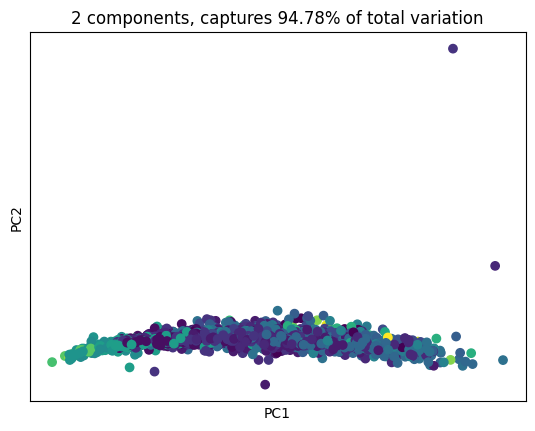

In [62]:
# Comparing to sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_normalized, y)
print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_normalized) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_color)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()

In [69]:
pca.explained_variance_ratio_

array([0.90787315, 0.03991891])